In [1]:
import pandas
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Massively simplified from the tutorial example so I can see what's going on

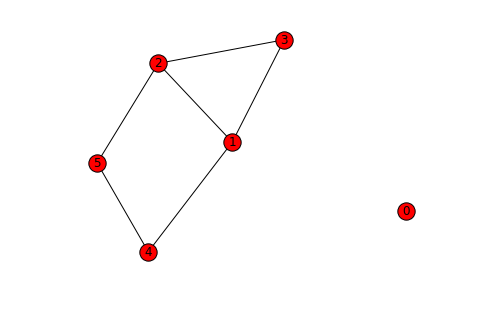

In [2]:
G = nx.Graph()
G.add_nodes_from(range(6))
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,5),(5,4)])
nx.draw(G, with_labels=True)

My attempt at implementing the `get_open_triangles()` function using list comprehensions.

In [3]:
def get_open_triangles(G, a):

    return [
        {a,b,c}
        for b in set(G.neighbors(a))          # A knows B
        for c in set(G.neighbors(b))          # B knows C
        if c!=b                               # C isn't me
        if c!=a                                
        if c not in set(G.neighbors(a))       # C doesn't know A
        
    ] + [

        {a,d,e}
        for d in set(G.neighbors(a))
        for e in set(G.neighbors(a))
        if d>e  # avoid dupes!
        if e not in set(G.neighbors(d))
    ]

In [4]:
def draw(nodes):
    for i, triplet in enumerate(nodes):
        fig = plt.figure(i)
        nx.draw(G.subgraph(triplet), with_labels=True)

There are 4 open triangles:
[{1, 2, 5}, {2, 3, 5}, {1, 4, 5}, {2, 4, 5}]


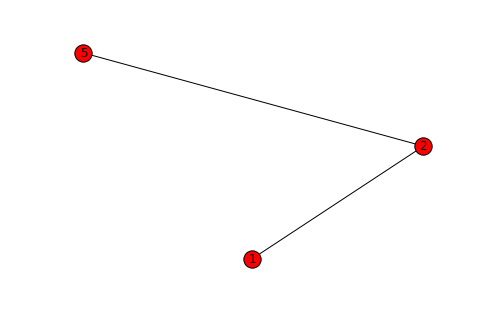

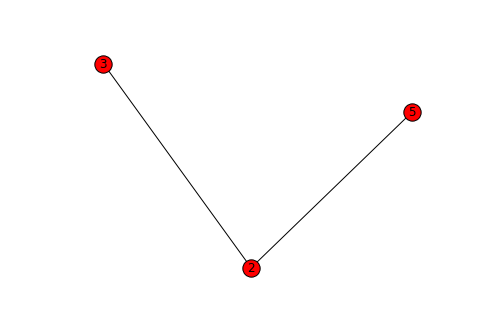

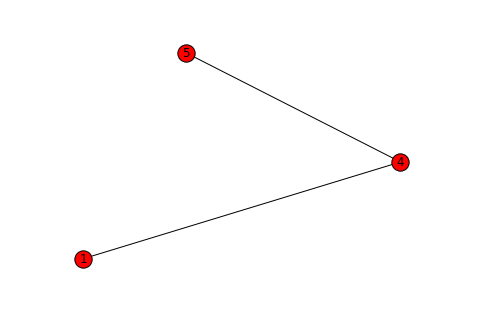

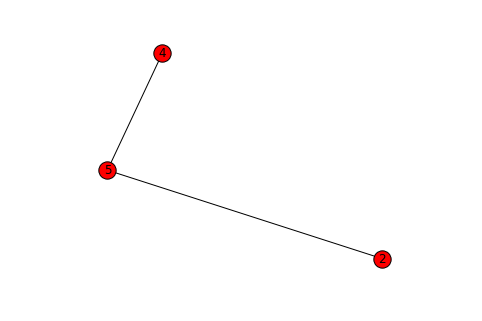

In [5]:
open_triangles=get_open_triangles(G,5)
print("There are {} open triangles:".format(len(open_triangles)))
print(open_triangles)
draw(open_triangles)